# Assignment Redi School Machine Learning Class
- Register on Kaggle
- Find Open Datasets and Machine Learning Projects | Kaggle
- Download a simple dataset (less than 5mb) and tell a story with your data. 
- Use Seaborn or Matplotlib
- (each person get 2 minutes in the next class to tell a story with their data).

### Install Packages

In [17]:
%pip install pandas numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


## Overview
This notebook aims to explore a heart disease dataset with the goal of uncovering key insights regarding age, gender, cholesterol levels, and other factors that affect the likelihood of heart disease. 
We'll leverage visualizations to tell the story of how these features relate to the occurrence of heart disease.
This heart disease dataset is acquired from one of the multispecialty hospitals in India. Over 14 common features make it one of the heart disease datasets available so far for research purposes. This dataset consists of 1000 subjects with 12 features. This dataset will be useful for building early-stage heart disease detection as well as for generating predictive machine-learning models.

### Import and Validate Packages

In [18]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for better visuals
sns.set(style="whitegrid")

#### Load the Data and display the few rows of the dataset

In [19]:
df = pd.read_csv('US-pumpkins.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [20]:
df.tail()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1
999,9990855,25,1,0,158,270,0,0,143,1,4.7,0,0,0


#### Explore and understand the Data
Let's start by inspecting the columns and general information about the dataset, such as the data types, presence of missing values, and summary statistics.

In [21]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [23]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


#### Handle Missing Values
It's important to check for any missing values, as they may skew our analysis or affect our visualizations.

In [24]:
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

#### Find Duplicate
Duplicates can introduce bias in our analysis, so we removed any duplicate entries from the dataset.

In [25]:
duplicates = df[df.duplicated()]
duplicates

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target


### Tell the Story of the Data

#### Heatmap
- Heatmaps helps visualize relationships between variables.

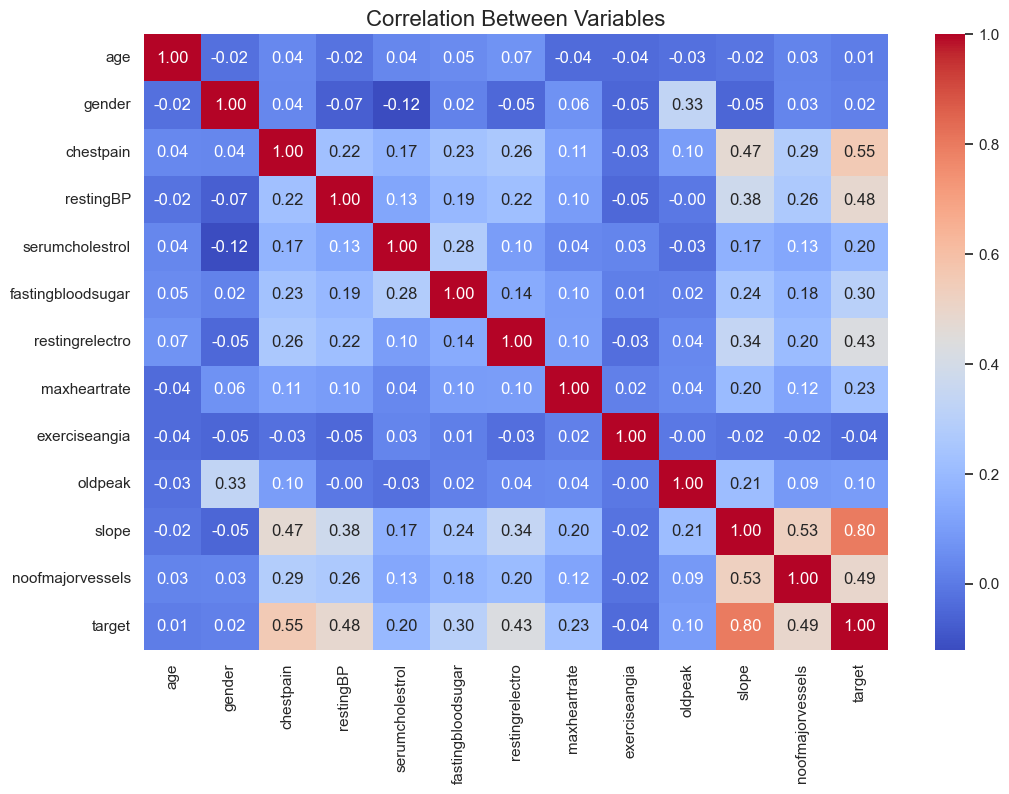

In [26]:
# Correlation heatmap excluding 'patientid'
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=['patientid']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Variables', fontsize=16)
plt.show()

#### Does Age or Gender Affect Heart Disease?

##### Distribution of Heart Disease by Age

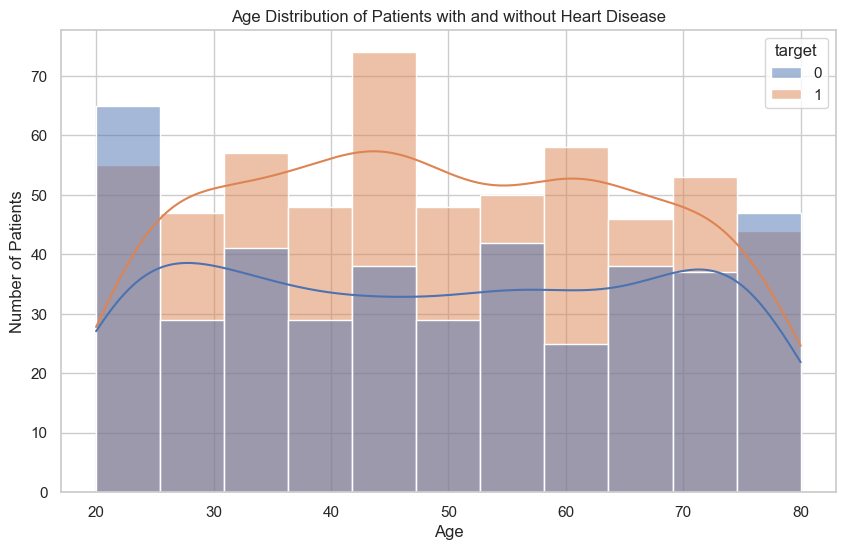

In [27]:
# Distribution of patients by age, color-coded by presence of heart disease
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Age Distribution of Patients with and without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

##### Interpretation: 
- Younger Age Groups (20-40 years):
The number of patients without heart disease is significantly higher.
Very few patients in these age groups have heart disease.
- Middle Age Groups (40-60 years):
The number of patients with heart disease starts to increase.
There is a noticeable rise in heart disease cases compared to younger age groups.
- Older Age Groups (60-80 years):
The number of patients with heart disease peaks.
The gap between patients with and without heart disease narrows, indicating a higher prevalence of heart disease in older age groups.
- This chart highlights that heart disease becomes more common as age increases, particularly from middle age onwards. 

##### Gender and Heart Disease

C:\Users\roner\AppData\Local\Temp\ipykernel_11760\2419349647.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


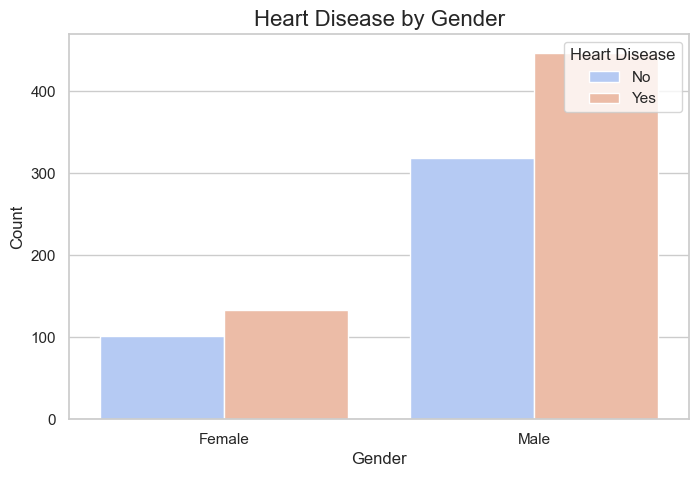

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
ax = sns.countplot(x='gender', hue='target', data=df, palette='coolwarm')
plt.title('Heart Disease by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Heart Disease', loc='upper right')

# Customize x-axis labels
ax.set_xticklabels(['Female', 'Male'])

plt.show()

##### Interpretation:
- This gender analysis shows that the likelihood of heart disease is notably higher in males than females.

##### Interpretation:
- Females: More females in this dataset have heart disease compared to those who don’t.
- Males: More males in this dataset do not have heart disease compared to those who do.
- This chart suggests a higher prevalence of heart disease among females in this dataset, while a larger proportion of males are without heart disease.

#### How Does Chest Pain Relate to Heart Disease?

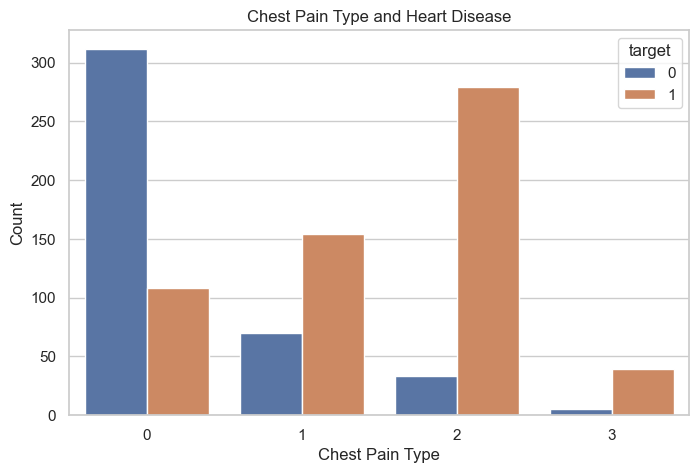

In [29]:
# Bar plot for chest pain type vs heart disease
plt.figure(figsize=(8,5))
sns.countplot(x='chestpain', hue='target', data=df)
plt.title('Chest Pain Type and Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

##### Interpretation: 
- Typical angina is more common in individuals without heart disease.
- Atypical angina is more frequent in individuals without heart disease, but there is a notable presence in those with heart disease as well.
- Non-anginal pain is more common in individuals with heart disease.
- Asymptomatic individuals are rare in both categories, but slightly more common in those with heart disease.

#### Cholesterol and Blood Pressure Levels as Predictors

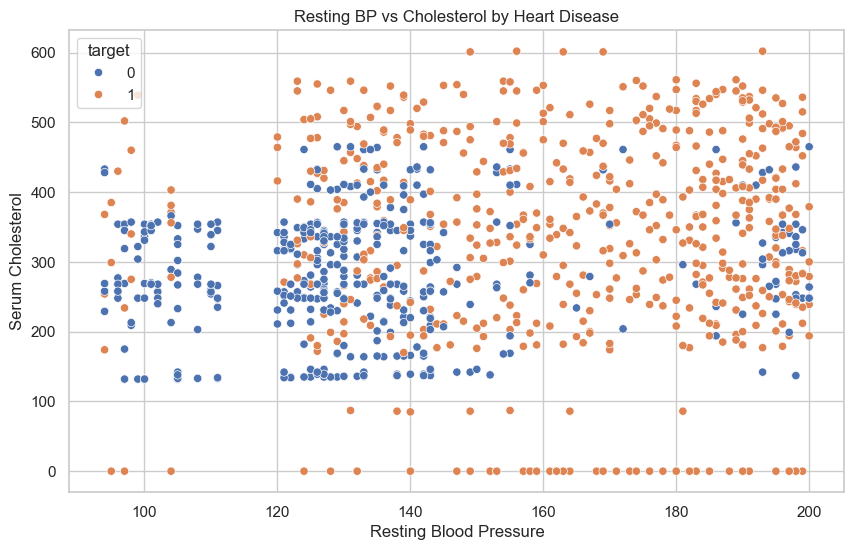

In [30]:
# Scatter plot of resting BP vs serum cholesterol
plt.figure(figsize=(10,6))
sns.scatterplot(x='restingBP', y='serumcholestrol', hue='target', data=df)
plt.title('Resting BP vs Cholesterol by Heart Disease')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Serum Cholesterol')
plt.show()

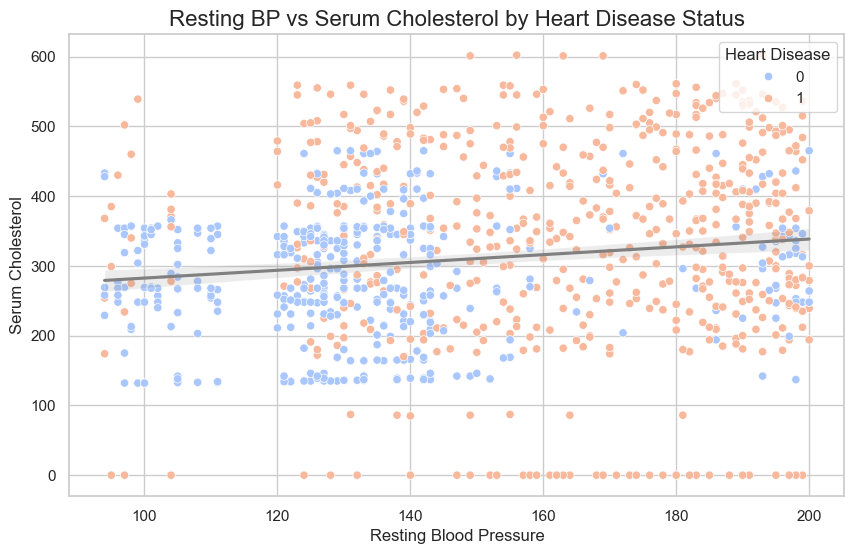

In [31]:
# Scatter plot of resting BP vs serum cholesterol with regression lines
plt.figure(figsize=(10,6))

# Scatter plot with hue for heart disease
sns.scatterplot(x='restingBP', y='serumcholestrol', hue='target', palette='coolwarm', data=df)

# Regression line added with 'data' parameter
sns.regplot(x='restingBP', y='serumcholestrol', scatter=False, color='grey', data=df)  # Adding trend line

plt.title('Resting BP vs Serum Cholesterol by Heart Disease Status', fontsize=16)
plt.xlabel('Resting Blood Pressure', fontsize=12)
plt.ylabel('Serum Cholesterol', fontsize=12)
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

##### Interpretation:
- This plot attempts to visualize any potential relationship between two important health metrics (resting blood pressure and serum cholesterol) and the presence of heart disease. However, from this plot, it seems that there isn’t a straightforward relationship between these variables and heart disease.

## Conclusion
From this analysis, we can draw several key insights:
- **Age** is a significant factor in heart disease, with cases becoming more frequent after the age of 40.
- There appears to be a **gender disparity** in heart disease prevalence, with males being more affected than females.
- Certain **chest pain types** are associated with a higher risk of heart disease, particularly non-anginal pain.